# 第4回演習「クラス分類」

この演習ではk近傍法を用いたクラス分類の方法を習得します。<hr />

0 [280 139] [164.61181651 124.78651221] 距離は 116.2602947023548 ラベルは0
1 [280 139] [264.79489894 171.62491674] 距離は 35.994170229868416 ラベルは1
2 [280 139] [306.34363731 135.8953206 ] 距離は 26.52595447665568 ラベルは1
3 [280 139] [323.95670958 178.31281463] 距離は 58.97194003280886 ラベルは1
4 [280 139] [288.38048385 189.41015421] 距離は 51.102017152320826 ラベルは0
5 [280 139] [229.48283511 174.17766472] 距離は 61.55852535332682 ラベルは0
6 [280 139] [317.7232358  186.97910252] 距離は 61.03307953763329 ラベルは1
7 [280 139] [240.35901199 153.03556765] 距離は 42.05240884499591 ラベルは0
8 [280 139] [298.74945267 126.11168346] 距離は 22.75193790998488 ラベルは1
9 [280 139] [312.43737225 176.65789466] 距離は 49.70211412715487 ラベルは1
10 [280 139] [204.29765748 170.2444328 ] 距離は 81.89663756229017 ラベルは0
11 [280 139] [341.95603111 181.20949463] 距離は 74.96793466425022 ラベルは1
12 [280 139] [231.9895469  149.94052478] 距離は 49.2412295676001 ラベルは0
13 [280 139] [281.84934028 169.10865503] 距離は 30.16539685114012 ラベルは0
14 [280 139] [263.98119747 174.8467927 ] 距離

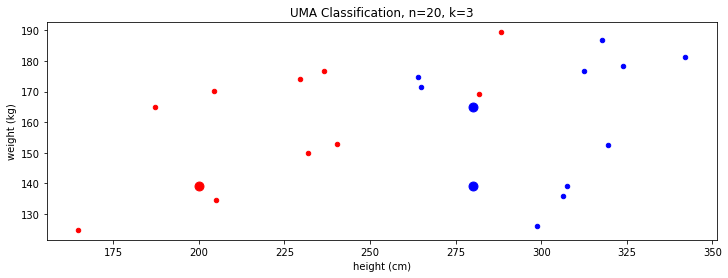

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from classification_clustering_data import * # 外部ファイルからデータ読込

説明変数Xの配列 = UMA_X # UMA_Xの内容は classification_clustering_data.py を見てください
# 既知の説明変数（UMAで言うと身長体重）
目的変数Yの配列 = UMA_Y # UMA_Yも同様
# 既知の目的変数（UMAで言うと性別ラベル）
未知Xの配列 = np.array([[280, 139],[200,139],[280,165]]) # 性別未知のUMAが3体
見る近傍の数 = 3

def ユークリッド距離を計算(身長体重1,身長体重2): # ピタゴラスの定理で計算
    # 点と点との直線距離を計算。累乗する
    return np.sqrt((身長体重2[0]-身長体重1[0])**2 + (身長体重2[1]-身長体重1[1])**2)

def 既知データ全てとの距離を計算(未知データの配列,既知データの配列):
    返す配列 = np.empty(0,float) # 空っぽの配列を作る
    カウント = 0 # いま既知データの何番目を見ているか、を覚えておく
    
    for 既知データi in 既知データの配列:
        ユークリッド距離=ユークリッド距離を計算(未知データの配列,既知データi)
        # ここで個別用の関数を繰り返し
        print(str(カウント)+" ",end="")
        print(未知データの配列,既知データi,end="")        
        print(" 距離は "+str(ユークリッド距離),end="")
        print(" ラベルは" + str(目的変数Yの配列[カウント]))
        返す配列=np.append(返す配列,ユークリッド距離)
        カウント += 1        
    return 返す配列

def 小さいほうから配列の番号をk個取得(配列,k):
    ソート済の配列 = 配列.argsort() # これ便利ですね　# 小さい順に並べる？
    return(ソート済の配列[0:k]) # 0からkの直前まで(kが3なら0,1,2番)

########## これよりメイン処理の前半(分類) ########## 
予測したラベルの配列 = np.empty(0,bool) # 未知データに割り当てるラベルの配列、空っぽで初期化

for 未知データi in range(len(未知Xの配列)): # 未知データの個数だけ繰り返す
    # 未知データ1つから全既知データへの距離  
    既知データとの距離の配列 = 既知データ全てとの距離を計算(未知Xの配列[未知データi],説明変数Xの配列)   
    n個の近所のラベルの配列 = np.empty(0,bool) # 多数決用ラベルの配列
    
    for index in (小さいほうから配列の番号をk個取得(既知データとの距離の配列,見る近傍の数)):
        n個の近所のラベルの配列=np.append(n個の近所のラベルの配列,目的変数Yの配列[index]) # 多数決用ラベル配列にappend    
        
    多数決の結果=stats.mode(n個の近所のラベルの配列, axis=0)[0]# stats.modeの返値の0番が最頻値    
    予測したラベルの配列=np.append(予測したラベルの配列,多数決の結果) 
    
    print("小さいほうから順に"+str(見る近傍の数),end="")
    print(小さいほうから配列の番号をk個取得(既知データとの距離の配列,見る近傍の数))
    print("多数決します",end="")
    print(n個の近所のラベルの配列,end="") # このラベル配列から多数決
    print(多数決の結果)    
        
分類結果=予測したラベルの配列
print("未知データの分類結果は "+str(分類結果))

########## これよりメイン処理の後半(図の表示) ########## 
plt.figure(figsize=(12, 4))
plt.title("UMA Classification, n=20, k="+str(見る近傍の数))
# plt.title("UMA Classification, n=20")
plt.xlabel("height (cm)")
plt.ylabel("weight (kg)")

# 集団ごとにfor文でscatterの色を分ける(既知データ)
colors=['red','blue'] # 分類結果が0ならred、1ならblue
############ この下の3行のコメントを外しましょう、その1 ############
for i in range(2): # 2値分類なので2
   散布図データ=説明変数Xの配列[目的変数Yの配列==i]
   plt.scatter(散布図データ[:,0],散布図データ[:,1],marker="o",c=colors[i],s=20)# 丸形でサイズ20
    
# 未知データも散布図へ重ねる
############ この下の3行のコメントを外しましょう、その2 ############
for i in range(2): # 2値分類なので2
   散布図データ=未知Xの配列[分類結果==i]    
#    plt.scatter(散布図データ[:,0],散布図データ[:,1],marker="o",c=colors[i],s=20)# 丸形でサイズ20
   plt.scatter(散布図データ[:,0],散布図データ[:,1],marker="o",c=colors[i],s=80)
#     任意課題(3)で形を変えたい時は、好きな形(星形など)やサイズにしましょう

plt.show()

ここまでで、第4回第2章は終了です。お疲れさまでした。
一息入れて、第3章の講義に進んでください。